## Holiday Sprint - Examining Legos!

**Imports**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

**Data Read-In**

In [2]:
legos = pd.read_csv('../data/lego_pieces.csv')

In [3]:
legos.head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,part_cat_name,color_name,color_rgb,color_trans,invt_version,invt_set_num,set_name,set_year,set_theme,total_set_parts,set_theme_name,set_theme_parentid
0,1,48379c01,72,1,f,Sports Promo Figure Base with Feet,27.0,Minifig Accessories,Dark Bluish Gray,6C6E68,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
1,1,48395,7,1,f,Sports Promo Snowboard from McDonald's Sports ...,27.0,Minifig Accessories,Light Gray,9BA19D,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
2,1,mcsport6,25,1,f,Sports Promo Figure Head Torso Assembly McDona...,13.0,Minifigs,Orange,FE8A18,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
3,1,paddle,0,1,f,Sports Promo Paddle from McDonald's Sports Sets,27.0,Minifig Accessories,Black,05131D,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
4,3,11816pr0005,78,1,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,Minifigs,Light Flesh,F6D7B3,f,1,3931-1,Emma's Splash Pool,2012,494,43,Friends,0.0


In [4]:
legos.tail()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,part_cat_name,color_name,color_rgb,color_trans,invt_version,invt_set_num,set_name,set_year,set_theme,total_set_parts,set_theme_name,set_theme_parentid
580246,18708,99206,0,3,f,Plate Special 2 x 2 x 0.667 with Two Studs On ...,9.0,Plates Special,Black,05131D,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580247,18708,99207,71,4,f,Bracket 1 x 2 - 2 x 2 Inverted,9.0,Plates Special,Light Bluish Gray,A0A5A9,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580248,18708,99780,15,4,f,Bracket 1 x 2 - 1 x 2 Inverted,9.0,Plates Special,White,FFFFFF,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580249,18708,99780,0,9,f,Bracket 1 x 2 - 1 x 2 Inverted,9.0,Plates Special,Black,05131D,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580250,18708,99780,72,5,f,Bracket 1 x 2 - 1 x 2 Inverted,9.0,Plates Special,Dark Bluish Gray,6C6E68,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0


In [5]:
f'The "legos" df is {legos.shape}, rows by columns.'

'The "legos" df is (580251, 19), rows by columns.'

In [6]:
legos.info()

#the floats 'part_cat_id' and 'set_theme_parentid' can be converted to int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inventory_id        580251 non-null  int64  
 1   part_num            580251 non-null  object 
 2   color_id            580251 non-null  int64  
 3   quantity            580251 non-null  int64  
 4   is_spare            580251 non-null  object 
 5   part_name           580069 non-null  object 
 6   part_cat_id         580069 non-null  float64
 7   part_cat_name       580069 non-null  object 
 8   color_name          580251 non-null  object 
 9   color_rgb           580251 non-null  object 
 10  color_trans         580251 non-null  object 
 11  invt_version        580251 non-null  int64  
 12  invt_set_num        580251 non-null  object 
 13  set_name            580251 non-null  object 
 14  set_year            580251 non-null  int64  
 15  set_theme           580251 non-nul

**Observing Data**

In [7]:
legos.isna().sum().sort_values(ascending = False)

part_name             182
part_cat_id           182
part_cat_name         182
inventory_id            0
invt_version            0
set_theme_name          0
total_set_parts         0
set_theme               0
set_year                0
set_name                0
invt_set_num            0
color_rgb               0
color_trans             0
part_num                0
color_name              0
is_spare                0
quantity                0
color_id                0
set_theme_parentid      0
dtype: int64

In [8]:
legos[legos.isna()]

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,part_cat_name,color_name,color_rgb,color_trans,invt_version,invt_set_num,set_name,set_year,set_theme,total_set_parts,set_theme_name,set_theme_parentid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#observing columns with dtype = object:

legos.loc[:, legos.dtypes == 'object']

,part_num,is_spare,part_name,part_cat_name,color_name,color_rgb,color_trans,invt_set_num,set_name,set_theme_name
0,48379c01,f,Sports Promo Figure Base with Feet,Minifig Accessories,Dark Bluish Gray,6C6E68,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,Gravity Games
1,48395,f,Sports Promo Snowboard from McDonald's Sports ...,Minifig Accessories,Light Gray,9BA19D,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,Gravity Games
2,mcsport6,f,Sports Promo Figure Head Torso Assembly McDona...,Minifigs,Orange,FE8A18,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,Gravity Games
3,paddle,f,Sports Promo Paddle from McDonald's Sports Sets,Minifig Accessories,Black,05131D,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,Gravity Games
4,11816pr0005,f,"Minifig Head Modified - Friends - Green Eyes, ...",Minifigs,Light Flesh,F6D7B3,f,3931-1,Emma's Splash Pool,Friends
...,...,...,...,...,...,...,...,...,...,...
580246,99206,f,Plate Special 2 x 2 x 0.667 with Two Studs On ...,Plates Special,Black,05131D,f,75090-2,Ezra's Speeder Bike,Star Wars Rebels
580247,99207,f,Bracket 1 x 2 - 2 x 2 Inverted,Plates Special,Light Bluish Gray,A0A5A9,f,75090-2,Ezra's Speeder Bike,Star Wars Rebels
580248,99780,f,Bracket 1 x 2 - 1 x 2 Inverted,Plates Special,White,FFFFFF,f,75090-2,Ezra's Speeder Bike,Star Wars Rebels
580249,99780,f,Bracket 1 x 2 - 1 x 2 Inverted,Plates Special,Black,05131D,f,75090-2,Ezra's Speeder Bike,Star Wars Rebels


Notes:
- 'is_spare' and 'color_trans' are t/f values and can be re-assigned 1/0
- the object 'part_cat_name' is represented by the flt 'part_cat_id' (needs to be converted to int)
- the objects 'color_name' and 'color_rgb' are represented by int 'color_id'
- the object 'invt_set_num' is represented by the int 'inventory_id'
- the object 'set_theme_name' is represented by the int 'set_theme'

In [10]:
legos.loc[:, legos.dtypes == 'object']['part_num'].value_counts()

6141            16550
3023            10359
3004             8634
3020             7566
3022             7052
                ...  
9610bc              1
6021444             1
973pr1607c01        1
973pr2092c01        1
24120               1
Name: part_num, Length: 23131, dtype: int64

In [11]:
#top ten most frequent parts in all sets:
legos.loc[:, legos.dtypes == 'object']['part_num'].value_counts(normalize = True)[0:10]

6141     0.028522
3023     0.017853
3004     0.014880
3020     0.013039
3022     0.012153
54200    0.012136
3710     0.011890
3003     0.010918
3024     0.010873
3005     0.009746
Name: part_num, dtype: float64

In [12]:
legos[legos['part_num'] == '6141']

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,part_cat_name,color_name,color_rgb,color_trans,invt_version,invt_set_num,set_name,set_year,set_theme,total_set_parts,set_theme_name,set_theme_parentid
24,3,6141,27,2,f,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Lime,BBE90B,f,1,3931-1,Emma's Splash Pool,2012,494,43,Friends,0.0
25,3,6141,29,1,f,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Bright Pink,E4ADC8,f,1,3931-1,Emma's Splash Pool,2012,494,43,Friends,0.0
26,3,6141,27,1,t,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Lime,BBE90B,f,1,3931-1,Emma's Splash Pool,2012,494,43,Friends,0.0
27,3,6141,29,1,t,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Bright Pink,E4ADC8,f,1,3931-1,Emma's Splash Pool,2012,494,43,Friends,0.0
44,4,6141,42,1,t,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Trans-Neon Green,F8F184,t,1,6942-1,Zo Weevil,1999,134,20,Insectoids,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580130,18704,6141,1,1,t,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Blue,0055BF,f,1,60159-1,Jungle Halftrack Mission,2017,614,378,Jungle,52.0
580131,18704,6141,0,1,t,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Black,05131D,f,1,60159-1,Jungle Halftrack Mission,2017,614,378,Jungle,52.0
580227,18708,6141,36,6,f,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Trans-Red,C91A09,t,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0
580228,18708,6141,72,10,f,Plate Round 1 x 1 with Solid Stud,21.0,Plates Round and Dishes,Dark Bluish Gray,6C6E68,f,1,75090-2,Ezra's Speeder Bike,2015,182,253,Star Wars Rebels,158.0


- The part 'Plate Round 1 x 1 with Solid Stud' is represented more than any other part. 

In [13]:
legos.loc[:, legos.dtypes == 'object']['is_spare'].value_counts(normalize = True)

f    0.949169
t    0.050831
Name: is_spare, dtype: float64

In [14]:
legos.loc[:, legos.dtypes == 'object']['part_name'].value_counts()

Plate Round 1 x 1 with Solid Stud                          16550
Plate 1 x 2                                                10359
Brick 1 x 2                                                 8634
Plate 2 x 4                                                 7859
Plate 2 x 2                                                 7052
                                                           ...  
Brick 2 x 2 with Minecraft Micro Mob Ghast Print               1
Panel 2 x 8 x 8 with A.I.R. Logo and Vents Print [4620]        1
Torso Friends - Medium Azure Top with White Trim               1
Large Figure Armor Plate Small with Mechanical Print           1
MINI HEAD NO. 1703                                             1
Name: part_name, Length: 22942, dtype: int64

In [15]:
legos.loc[:, legos.dtypes == 'object']['part_cat_name'].value_counts()

Plates                                          80399
Bricks                                          54110
Bricks Sloped                                   37509
Plates Special                                  34690
Minifigs                                        34236
Minifig Accessories                             33877
Plates Round and Dishes                         25982
Tiles                                           24352
Hinges, Arms and Turntables                     14593
Technic Pins                                    14138
Bricks Round and Cones                          13885
Bricks Curved                                   13012
Bricks Special                                  12860
Technic Connectors                              12588
Bars, Ladders and Fences                        11959
Plants and Animals                              11199
Technic Axles                                   10556
Wheels and Tyres                                10336
Tiles Special               

In [16]:
legos.loc[:, legos.dtypes == 'object']['part_cat_name'].value_counts(normalize = True)[0:10]

Plates                         0.138602
Bricks                         0.093282
Bricks Sloped                  0.064663
Plates Special                 0.059803
Minifigs                       0.059021
Minifig Accessories            0.058402
Plates Round and Dishes        0.044791
Tiles                          0.041981
Hinges, Arms and Turntables    0.025157
Technic Pins                   0.024373
Name: part_cat_name, dtype: float64

In [17]:
legos.loc[:, legos.dtypes == 'object']['color_name'].value_counts()
#exluding 'color_rgb' as it represents the same thing as 'color_name'

Black                     115176
White                      66549
Light Bluish Gray          55317
Red                        50217
Dark Bluish Gray           43913
                           ...  
Very Light Gray                2
Medium Violet                  2
Chrome Green                   2
Very Light Orange              2
Trans Light Royal Blue         1
Name: color_name, Length: 131, dtype: int64

In [18]:
legos.loc[:, legos.dtypes == 'object']['color_trans'].value_counts(normalize = True)

f    0.93741
t    0.06259
Name: color_trans, dtype: float64

In [19]:
legos.loc[:, legos.dtypes == 'object']['invt_set_num'].value_counts()

10255-1      769
71040-1      700
75827-1      687
75053-1      594
71016-1      593
            ... 
108-1          1
918-red-2      1
8885-1         1
970634-1       1
7854-1         1
Name: invt_set_num, Length: 10713, dtype: int64

**Data Cleaning**

In [20]:
legos.columns

Index(['inventory_id', 'part_num', 'color_id', 'quantity', 'is_spare',
       'part_name', 'part_cat_id', 'part_cat_name', 'color_name', 'color_rgb',
       'color_trans', 'invt_version', 'invt_set_num', 'set_name', 'set_year',
       'set_theme', 'total_set_parts', 'set_theme_name', 'set_theme_parentid'],
      dtype='object')

In [21]:
def pipeline(df):
   #setting up a cast dictionary for mapping the columns with t/f values:
    cast = {
        'f': 0,
        't': 1
            }
    
    #dropping instances of null values:
    df.dropna(inplace = True)
    
    #dropping columns represented multiple times:
    df.drop(columns = ['part_cat_name', 'color_name', 'color_rgb',
                       'invt_set_num', 'set_theme_name'],
            inplace = True)
    
    #converting float dtypes:
    df['part_cat_id']        = df['part_cat_id'].astype('int64')
    df['set_theme_parentid'] = df['set_theme_parentid'].astype('int64')

    #extrapolating set age from dataset, based on the year data was collected (2017):
    df['set_age'] = 2017 - df['set_year']
    
    #creating column that's quantity/total_set_parts:
    df['percent_of_set'] = round(df['quantity'] / df['total_set_parts'], 4)
    
    #mapping the cast dict to t/f features:
    df['is_spare'] = df['is_spare'].map(cast).astype('int64')
    df['color_trans'] = df['color_trans'].map(cast).astype('int64')
    
    #getting dummies:
    
    return df

#recall:
#the object 'part_cat_name' is represented by the flt 'part_cat_id' (needs to be converted to int)
#the objects 'color_name' and 'color_rgb' are represented by int 'color_id'
#the object 'invt_set_num' is represented by the int 'inventory_id'
#the object 'set_theme_name' is represented by the int 'set_theme'

In [22]:
legos = pipeline(legos)

In [23]:
legos.head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
0,1,48379c01,72,1,0,Sports Promo Figure Base with Feet,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
1,1,48395,7,1,0,Sports Promo Snowboard from McDonald's Sports ...,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
2,1,mcsport6,25,1,0,Sports Promo Figure Head Torso Assembly McDona...,13,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
3,1,paddle,0,1,0,Sports Promo Paddle from McDonald's Sports Sets,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
4,3,11816pr0005,78,1,0,"Minifig Head Modified - Friends - Green Eyes, ...",13,0,1,Emma's Splash Pool,2012,494,43,0,5,0.0233


In [24]:
legos['is_spare'].value_counts(normalize = True)

#checking that value_counts for 0/1's are the same as f/t's

0    0.949153
1    0.050847
Name: is_spare, dtype: float64

In [25]:
legos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580069 entries, 0 to 580250
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inventory_id        580069 non-null  int64  
 1   part_num            580069 non-null  object 
 2   color_id            580069 non-null  int64  
 3   quantity            580069 non-null  int64  
 4   is_spare            580069 non-null  int64  
 5   part_name           580069 non-null  object 
 6   part_cat_id         580069 non-null  int64  
 7   color_trans         580069 non-null  int64  
 8   invt_version        580069 non-null  int64  
 9   set_name            580069 non-null  object 
 10  set_year            580069 non-null  int64  
 11  set_theme           580069 non-null  int64  
 12  total_set_parts     580069 non-null  int64  
 13  set_theme_parentid  580069 non-null  int64  
 14  set_age             580069 non-null  int64  
 15  percent_of_set      580069 non-nul

**Exploratory Data Analysis**

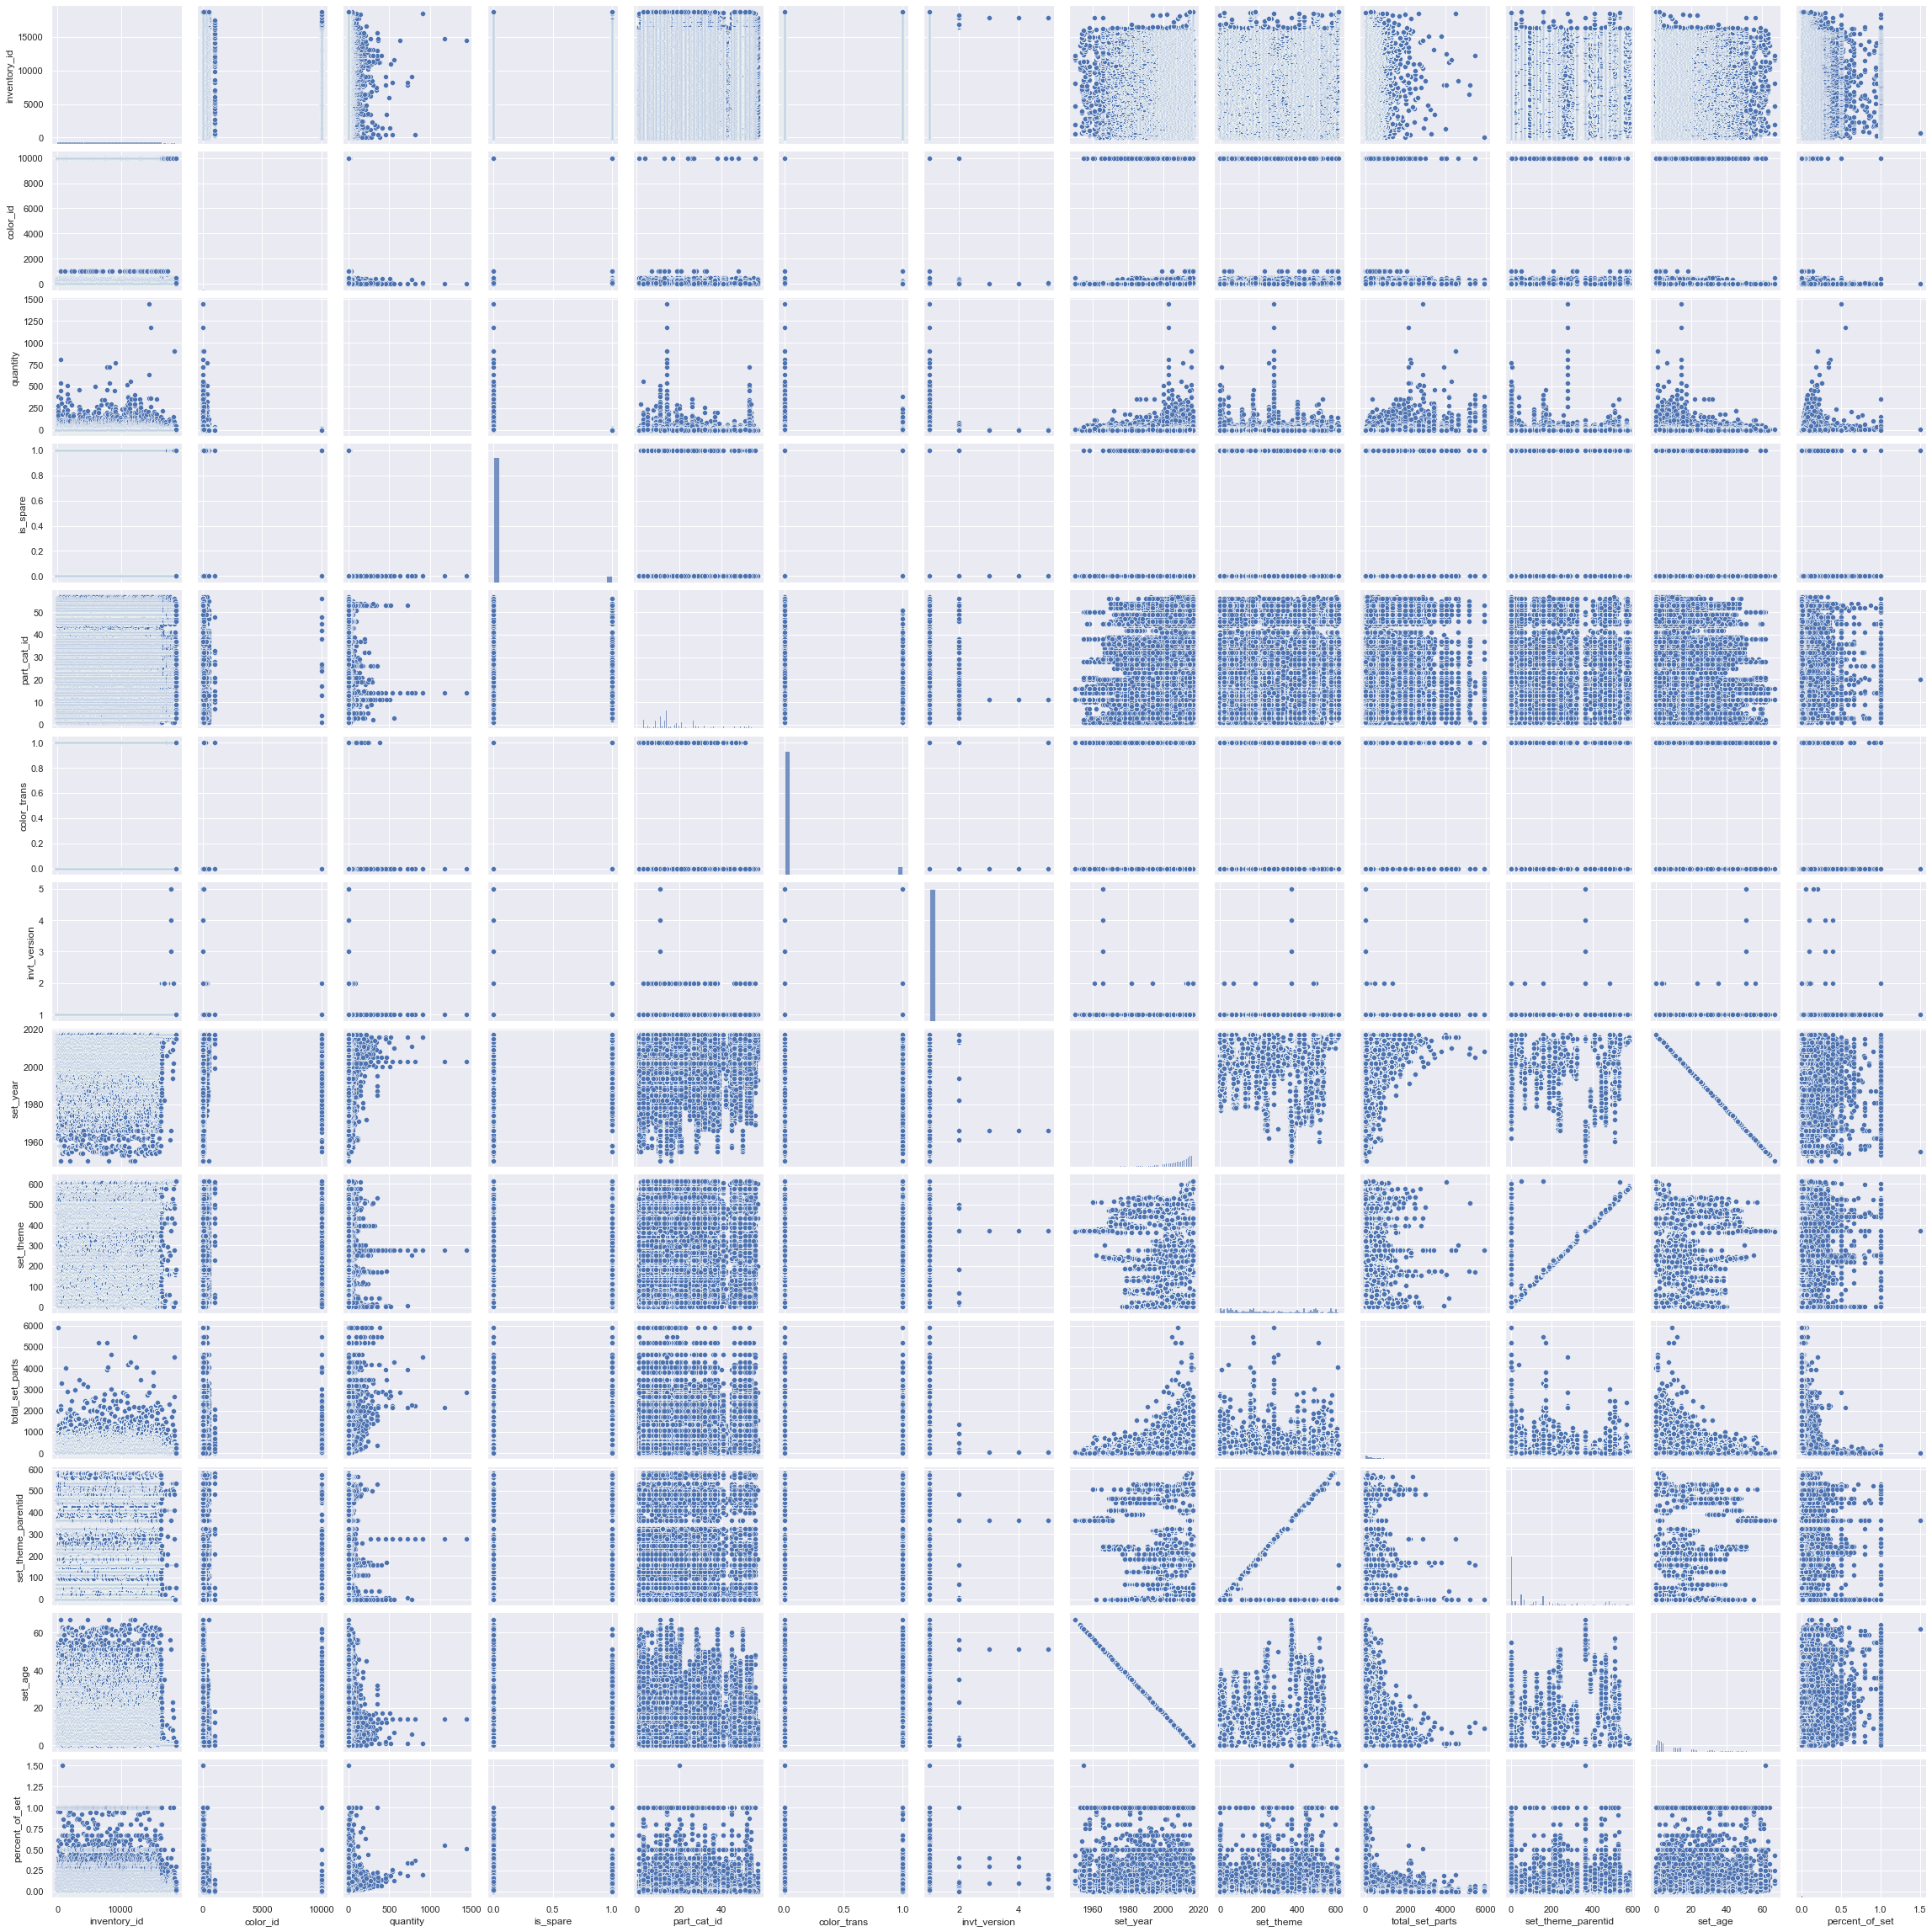

In [26]:
sns.pairplot(legos);

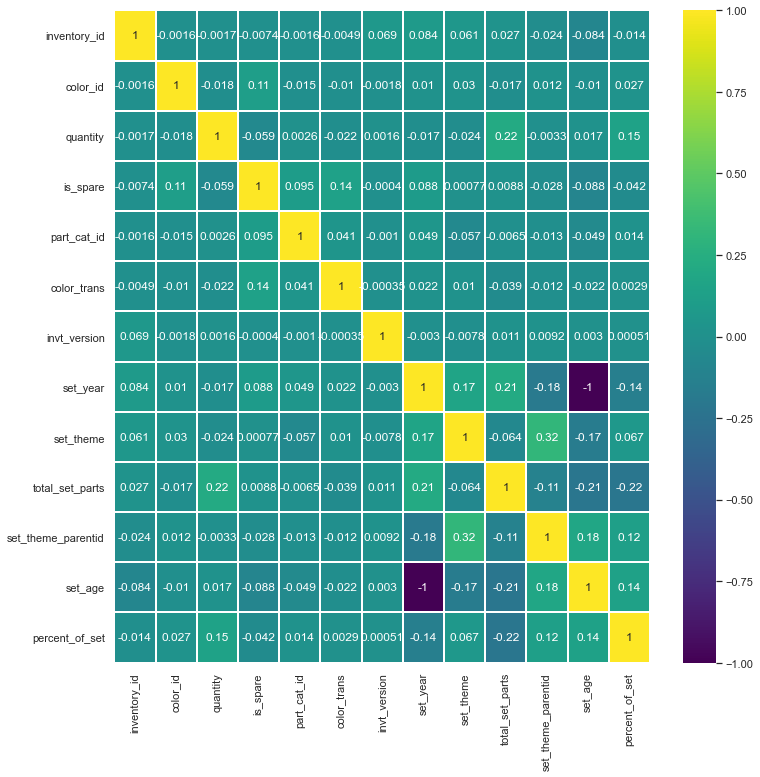

In [27]:
plt.figure(figsize = (12, 12))

sns.heatmap(legos.corr(),
            vmin = -1,
            vmax = 1,
            cmap = 'viridis',
            annot = True,
            linewidths = 1);

- Creating heatmaps for the three (3) features I will attempt to model on:

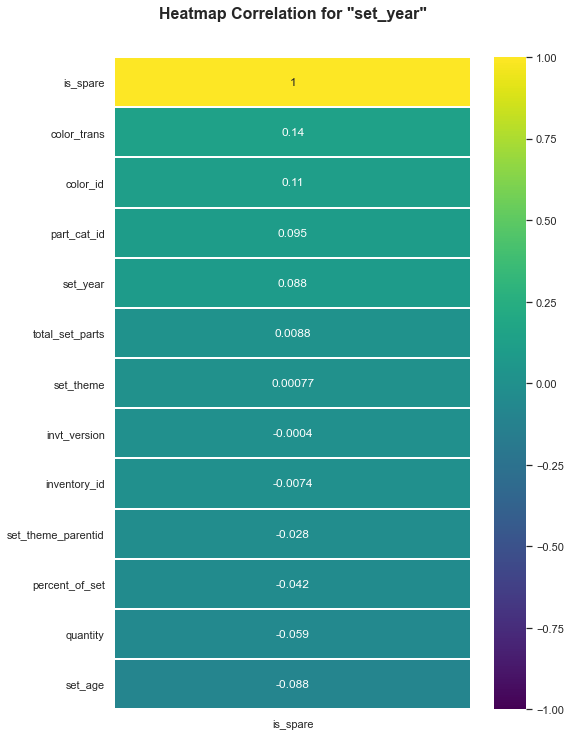

In [28]:
plt.figure(figsize = (8, 12))

sns.heatmap(legos.corr()[['is_spare']].sort_values('is_spare', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = 1,
            cmap='viridis')

plt.title('Heatmap Correlation for "set_year"',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05);

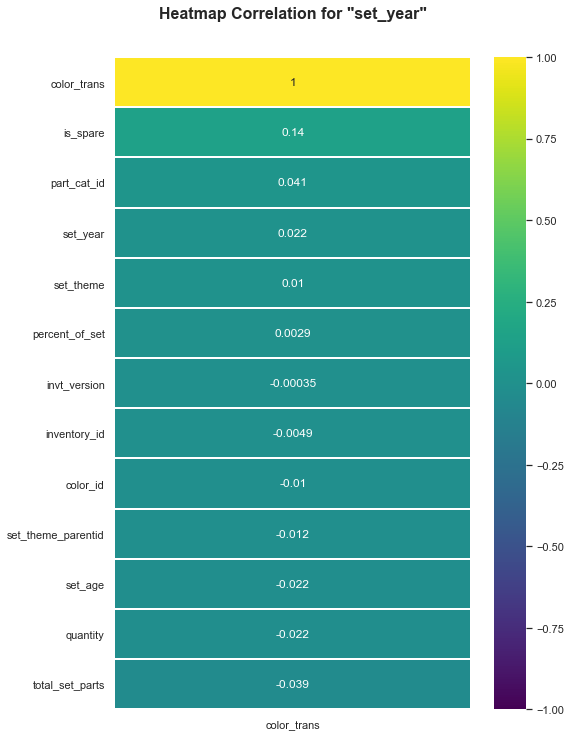

In [29]:
plt.figure(figsize = (8, 12))

sns.heatmap(legos.corr()[['color_trans']].sort_values('color_trans', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = 1,
            cmap='viridis')

plt.title('Heatmap Correlation for "set_year"',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05);

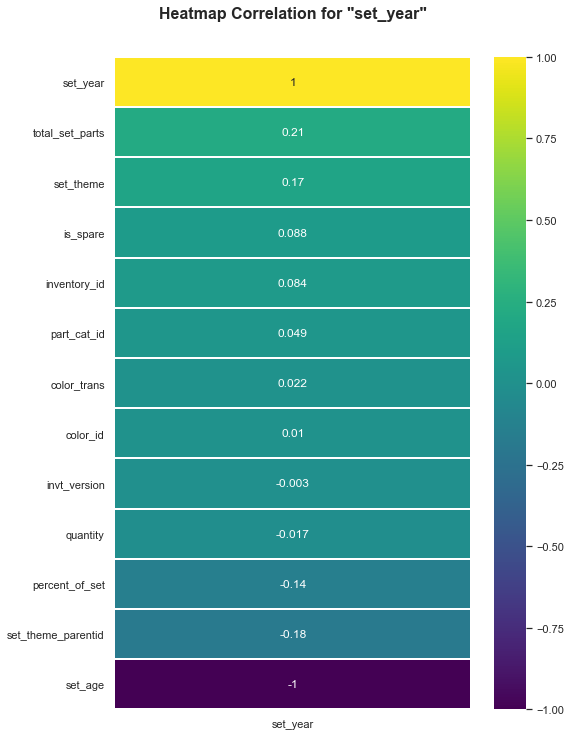

In [30]:
plt.figure(figsize = (8, 12))

sns.heatmap(legos.corr()[['set_year']].sort_values('set_year', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = 1,
            cmap='viridis')

plt.title('Heatmap Correlation for "set_year"',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05);

In [31]:
legos['part_name'].nunique()

22942

In [32]:
legos['part_num'].nunique()

23114

In [33]:
legos['set_name'].nunique()

9457

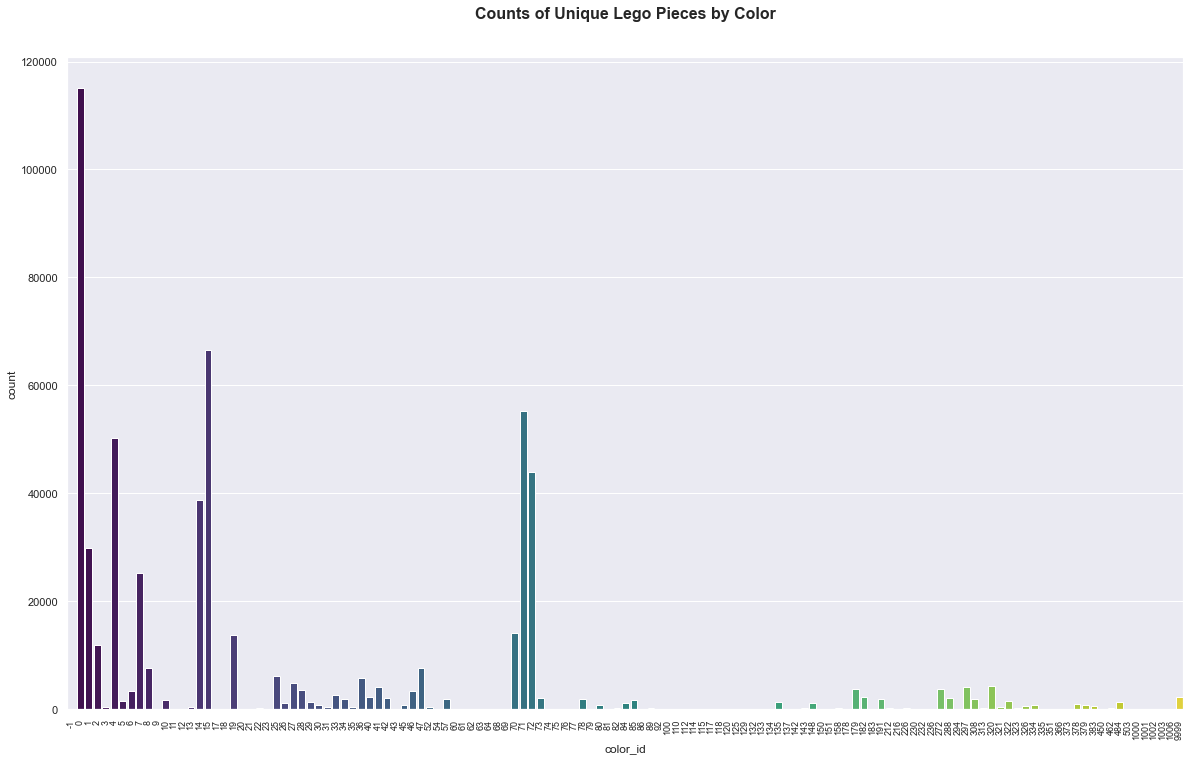

In [34]:
plt.figure(figsize = (20, 12))

sns.countplot(x = 'color_id',
              data = legos,
              palette = 'viridis')

plt.title('Counts of Unique Lego Pieces by Color',
          fontsize = 16, 
          fontweight = 'bold',
          y = 1.05)
plt.xticks(fontsize = 9, 
           rotation = 90);

In [35]:
most_pop_colors = legos['color_id'].value_counts()[0:10].index
most_pop_colors

Int64Index([0, 15, 71, 4, 72, 14, 1, 7, 70, 19], dtype='int64')

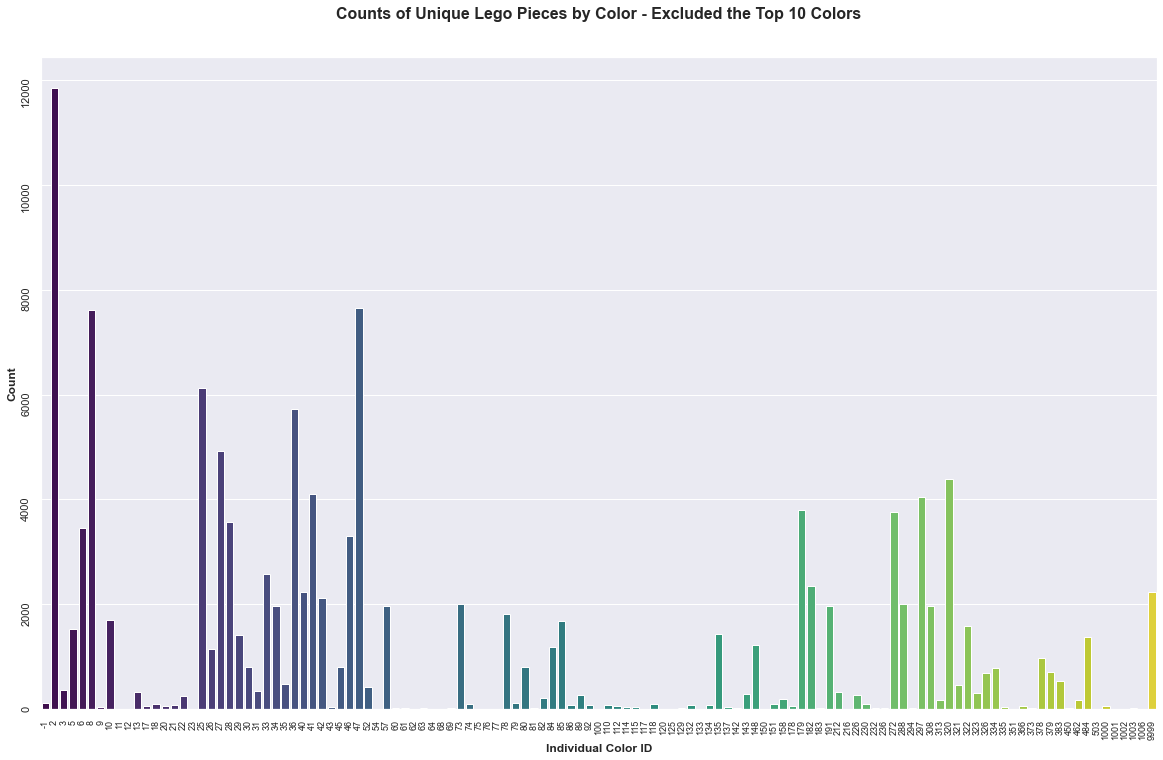

In [36]:
plt.figure(figsize = (20, 12))

sns.countplot(x = 'color_id',
              data = legos[-legos['color_id'].isin(most_pop_colors)],
              palette = 'viridis')

plt.title('Counts of Unique Lego Pieces by Color - Excluded the Top 10 Colors',
          fontsize = 16, 
          fontweight = 'bold', 
          y = 1.05)

plt.xticks(fontsize = 9,
           rotation = 90)
plt.xlabel('Individual Color ID',
          fontweight = 'bold')

plt.yticks(rotation = 90)
plt.ylabel('Count',
          fontweight = 'bold');

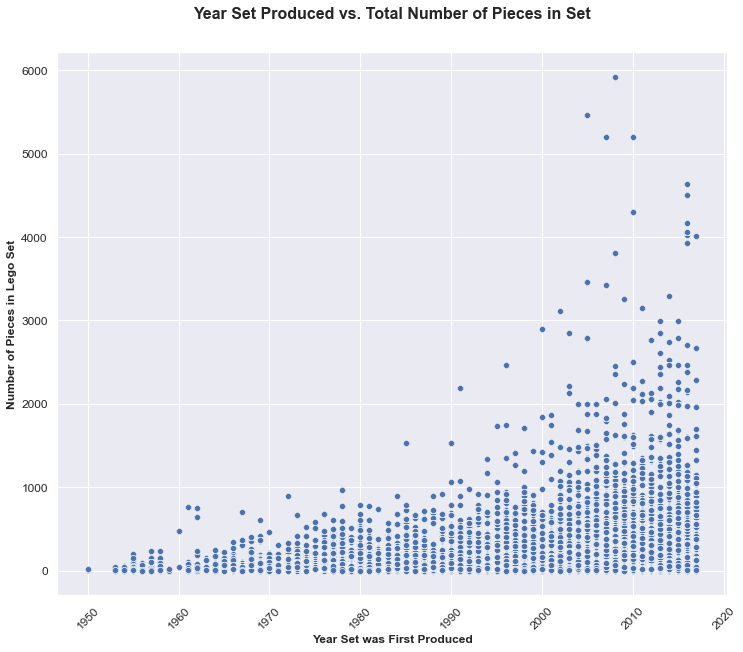

In [37]:
plt.figure(figsize = (12, 10))

sns.scatterplot(x = legos['set_year'],
                y = legos['total_set_parts'])

plt.title('Year Set Produced vs. Total Number of Pieces in Set',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Year Set was First Produced',
          fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Number of Pieces in Lego Set',
          fontweight = 'bold')

plt.tick_params(labelsize = 12)

plt.show();

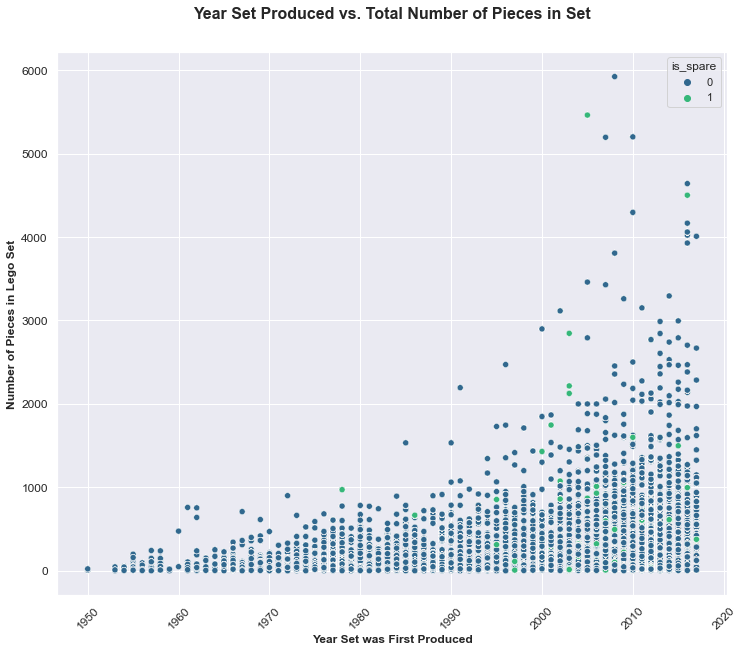

In [38]:
#the above plot but hued for 'is_spare', a feature I will later model for:
plt.figure(figsize = (12, 10))

sns.scatterplot(x = legos['set_year'],
                y = legos['total_set_parts'],
                hue = legos['is_spare'],
                palette = 'viridis')

plt.title('Year Set Produced vs. Total Number of Pieces in Set',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Year Set was First Produced',
          fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Number of Pieces in Lego Set',
          fontweight = 'bold')

plt.tick_params(labelsize = 12)

plt.show();

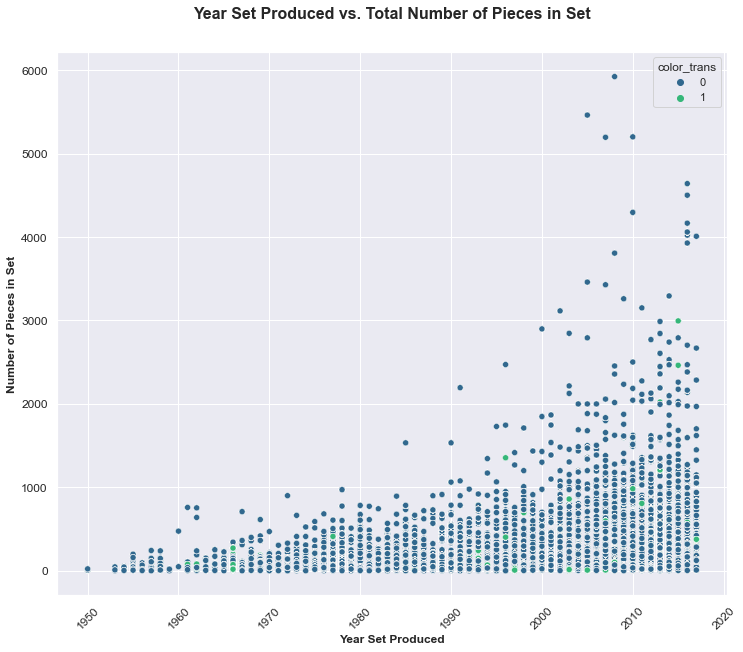

In [39]:
#the above plot but hued for 'color_trans', a feature I will later model for:
plt.figure(figsize = (12, 10))

sns.scatterplot(x = legos['set_year'],
                y = legos['total_set_parts'],
                hue = legos['color_trans'],
                palette = 'viridis')

plt.title('Year Set Produced vs. Total Number of Pieces in Set',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Year Set Produced',
          fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Number of Pieces in Set',
          fontweight = 'bold')

plt.tick_params(labelsize = 12)

plt.show();

In [40]:
legos.head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
0,1,48379c01,72,1,0,Sports Promo Figure Base with Feet,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
1,1,48395,7,1,0,Sports Promo Snowboard from McDonald's Sports ...,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
2,1,mcsport6,25,1,0,Sports Promo Figure Head Torso Assembly McDona...,13,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
3,1,paddle,0,1,0,Sports Promo Paddle from McDonald's Sports Sets,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
4,3,11816pr0005,78,1,0,"Minifig Head Modified - Friends - Green Eyes, ...",13,0,1,Emma's Splash Pool,2012,494,43,0,5,0.0233


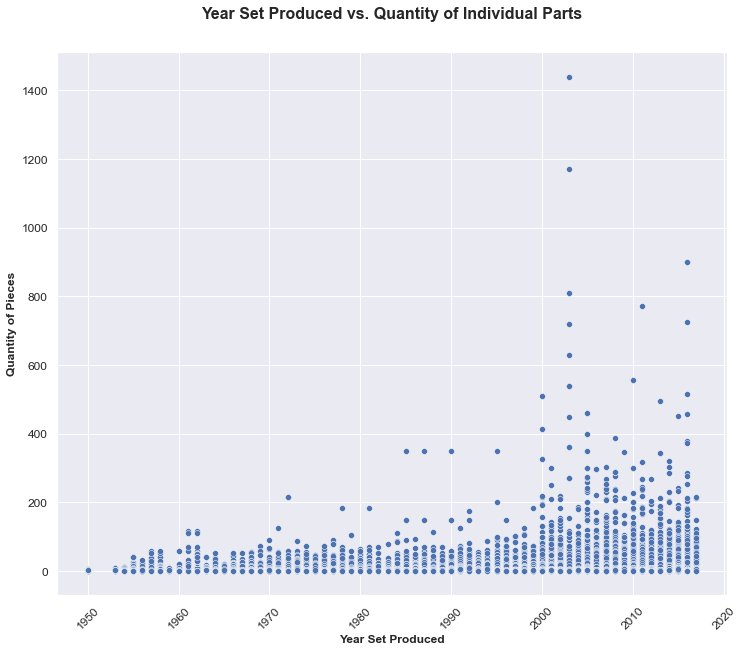

In [41]:
plt.figure(figsize = (12, 10))

sns.scatterplot(x = 'set_year',
                y = 'quantity',
                data = legos);

plt.title('Year Set Produced vs. Quantity of Individual Parts',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Year Set Produced',
          fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Quantity of Pieces',
          fontweight = 'bold')

plt.tick_params(labelsize = 12)

plt.show();

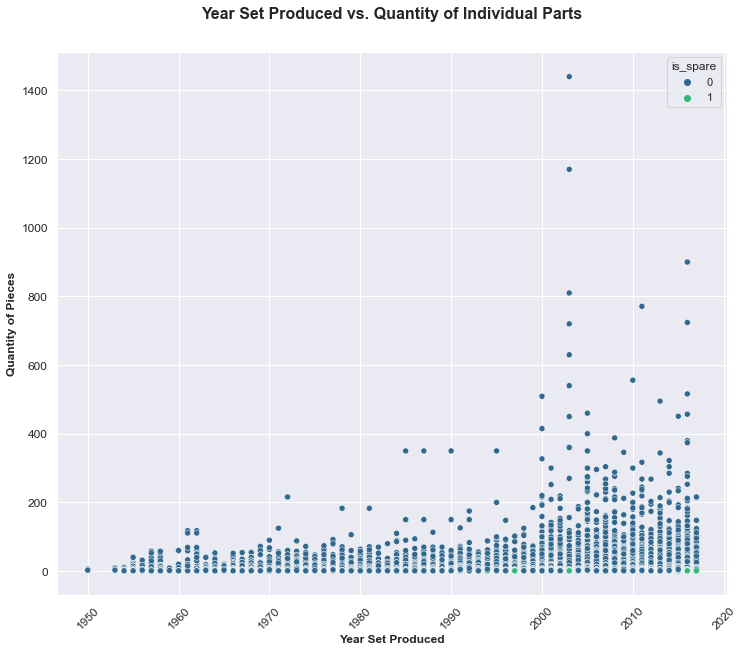

In [42]:
##the above plot but hued for 'is_spare', a feature I will later model for:
plt.figure(figsize = (12, 10))

sns.scatterplot(x = 'set_year',
                y = 'quantity',
                hue = 'is_spare',
                data = legos,
                palette = 'viridis');

plt.title('Year Set Produced vs. Quantity of Individual Parts',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Year Set Produced',
          fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Quantity of Pieces',
          fontweight = 'bold')

plt.tick_params(labelsize = 12)

plt.show();

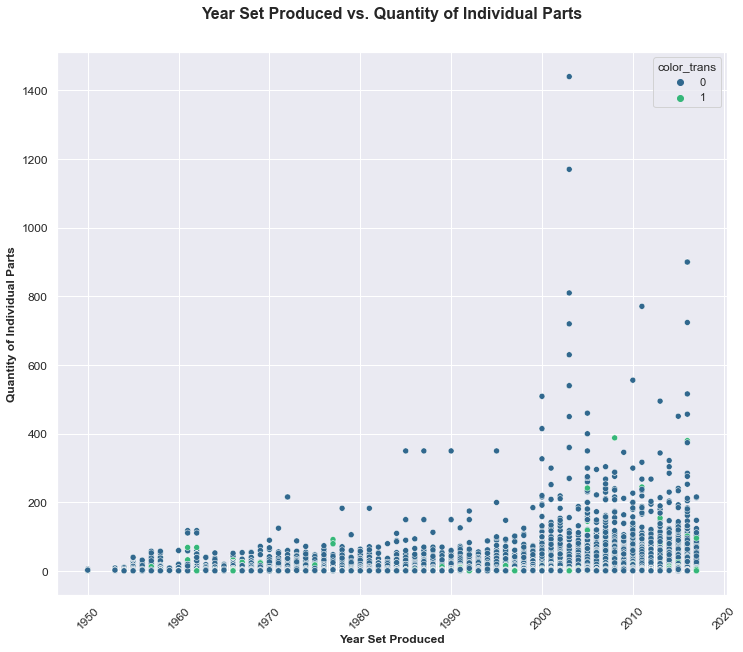

In [43]:
##the above plot but hued for 'color_trans', a feature I will later model for:
plt.figure(figsize = (12, 10))

sns.scatterplot(x = 'set_year',
                y = 'quantity',
                hue = 'color_trans',
                data = legos,
                palette = 'viridis');

plt.title('Year Set Produced vs. Quantity of Individual Parts',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Year Set Produced',
          fontweight = 'bold')
plt.xticks(rotation = 45)

plt.ylabel('Quantity of Individual Parts',
          fontweight = 'bold')

plt.tick_params(labelsize = 12)

plt.show();

In [44]:
#observing the lego set where there's an instance of quantity > 1,400:

legos[legos['quantity'] > 1400]

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
492590,14469,3024,15,1440,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.506


In [45]:
legos[legos['inventory_id'] == 14469]

#https://www.bricklink.com/v2/catalog/catalogitem.page?S=k34432-1#T=I

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
492587,14469,3022,0,2,0,Plate 2 x 2,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.0007
492588,14469,3024,0,630,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.2214
492589,14469,3024,72,360,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.1265
492590,14469,3024,15,1440,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.5060
492591,14469,3024,71,360,0,Plate 1 x 1,14,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.1265
492592,14469,3037,0,44,0,Slope 45° 2 x 4,3,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.0155
492593,14469,3038,0,2,0,Slope 45° 2 x 3,3,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.0007
492594,14469,3046a,0,6,0,Slope 45° 2 x 2 Double Concave,3,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.0021
492595,14469,3176,0,1,0,Plate Special 3 x 2 with Hole,9,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.0004
492596,14469,4186,71,1,0,Baseplate 48 x 48,1,0,1,Lego Mosaic Dino,2003,277,2846,276,14,0.0004


In [46]:
#array of average number of pieces per part-type - by year: 
avg_parts_year = legos.groupby('set_year')['quantity'].mean()
avg_parts_year

set_year
1950    1.543478
1953    3.666667
1954    1.765306
1955    5.378238
1956    2.674699
          ...   
2013    3.193621
2014    3.016953
2015    2.854090
2016    3.109316
2017    2.883912
Name: quantity, Length: 66, dtype: float64

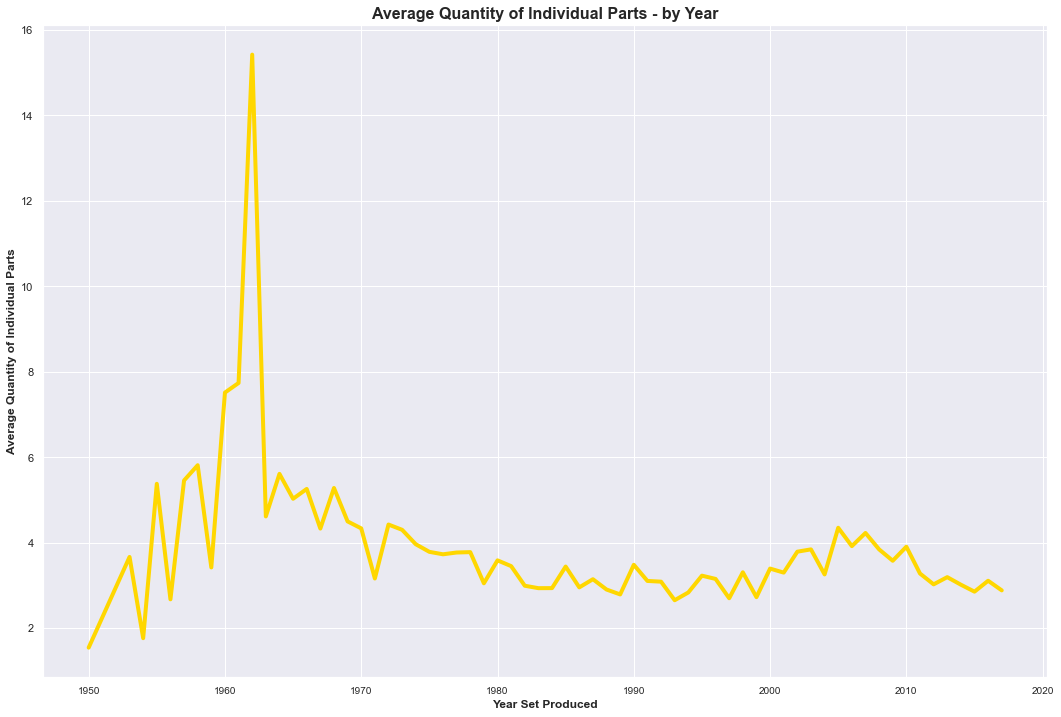

In [47]:
#plotting avg_parts_year:
plt.figure(figsize = (18, 12))

avg_parts_year.plot(color = 'gold',
                    linewidth = 4)

plt.title('Average Quantity of Individual Parts - by Year',
          fontsize = 16,
          fontweight = 'bold')

plt.xlabel('Year Set Produced',
           fontweight = 'bold')
plt.xticks(fontsize = 10)

plt.ylabel('Average Quantity of Individual Parts',
           fontweight = 'bold');

In [48]:
#observing the year with highest mean for 'quantity':
legos[legos['set_year'] == 1962].head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
3766,99,3023a,14,50,0,Plate 1 x 2 [Old Style Bottom],14,0,1,1 x 1 and 1 x 2 Plates - Yellow (architectural...,1962,252,82,0,55,0.6098
3767,99,3024,14,30,0,Plate 1 x 1,14,0,1,1 x 1 and 1 x 2 Plates - Yellow (architectural...,1962,252,82,0,55,0.3659
3768,99,728,7,1,0,Plate 8 x 11,14,0,1,1 x 1 and 1 x 2 Plates - Yellow (architectural...,1962,252,82,0,55,0.0122
3769,99,729,47,1,0,Container - Box 8 x 11 x 3 Top,7,1,1,1 x 1 and 1 x 2 Plates - Yellow (architectural...,1962,252,82,0,55,0.0122
5155,138,3022,47,40,0,Plate 2 x 2,14,1,1,2 x 2 Plates - Trans-Clear (architectural hobb...,1962,252,42,0,55,0.9524


In [49]:
legos[['quantity']].value_counts()[0:10].sort_index()

quantity
1           239353
2           161772
3            31208
4            62062
5            11448
6            20140
7             5204
8            13719
10            5943
12            4808
dtype: int64

In [50]:
legos[['quantity']].value_counts(normalize = True)[0:10]

quantity
1           0.412628
2           0.278884
4           0.106991
3           0.053800
6           0.034720
8           0.023651
5           0.019736
10          0.010245
7           0.008971
12          0.008289
dtype: float64

- ~41% of Lego parts appear as single pieces. 
- ~27% of Lego parts come with 2 pieces.
- ~11% of Lego parts come with 4 pieces.

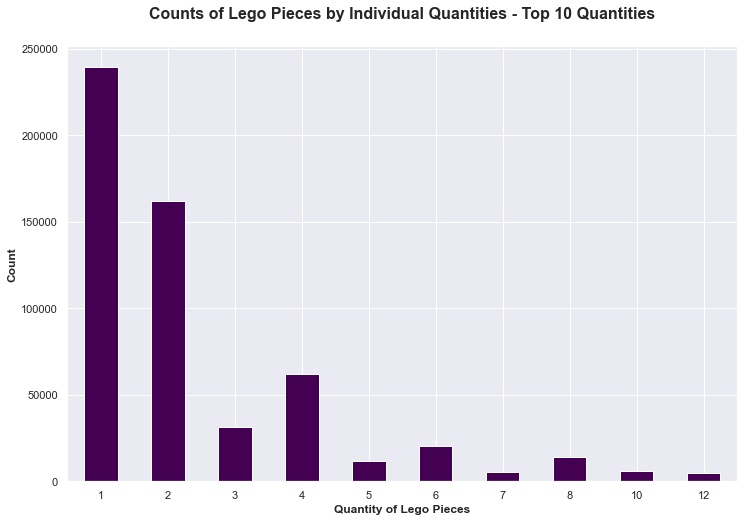

In [51]:
plt.figure(figsize = (12, 8))

legos[['quantity']].value_counts()[0:10].sort_index().plot(kind = 'bar', cmap = 'viridis')

plt.title('Counts of Lego Pieces by Individual Quantities - Top 10 Quantities',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Quantity of Lego Pieces',
          fontsize = 12,
          fontweight = 'bold')
plt.xticks(ticks = [0, 1, 2, 3,
                    4, 5, 6, 7,
                    8, 9],
           labels = [1, 2, 3, 4,
                    5, 6, 7, 8,
                    10, 12],
           rotation = 0)

plt.ylabel('Count',
          fontsize = 12,
          fontweight = 'bold')

plt.show();

In [52]:
legos[['quantity']].value_counts()[0:20].sort_index()

quantity
1           239353
2           161772
3            31208
4            62062
5            11448
6            20140
7             5204
8            13719
9             3216
10            5943
11            1957
12            4808
13            1292
14            2395
15             980
16            2496
17             669
18            1309
20            1439
24             829
dtype: int64

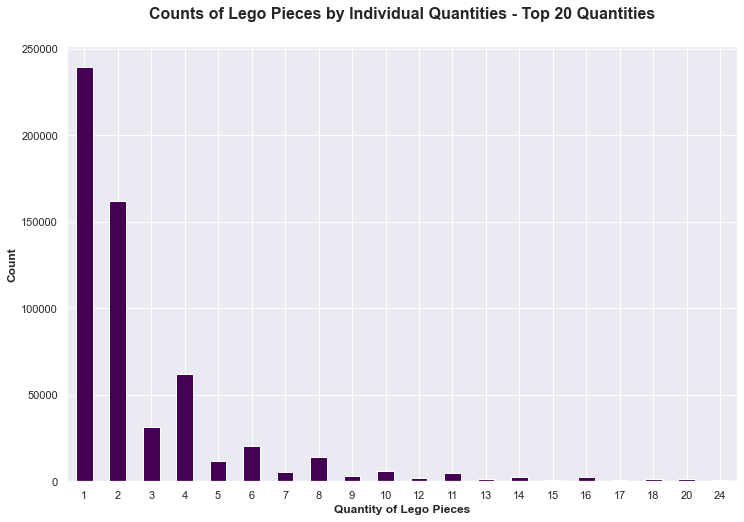

In [53]:
plt.figure(figsize = (12, 8))

legos[['quantity']].value_counts()[0:20].sort_index().plot(kind = 'bar', cmap = 'viridis')

plt.title('Counts of Lego Pieces by Individual Quantities - Top 20 Quantities',
         fontsize = 16,
         fontweight = 'bold',
         y = 1.05)

plt.xlabel('Quantity of Lego Pieces',
          fontsize = 12,
          fontweight = 'bold')
plt.xticks(ticks = [0, 1, 2, 3,
                    4, 5, 6, 7,
                    8, 9, 10, 11, 
                    12, 13, 14, 15,
                    16, 17, 18, 19],
           labels = [1, 2, 3, 4,
                     5, 6, 7, 8,
                     9, 10, 12, 11,
                     13, 14, 15, 16, 
                     17, 18, 20, 24],
           rotation = 0)

plt.ylabel('Count',
          fontsize = 12,
          fontweight = 'bold')

plt.show();

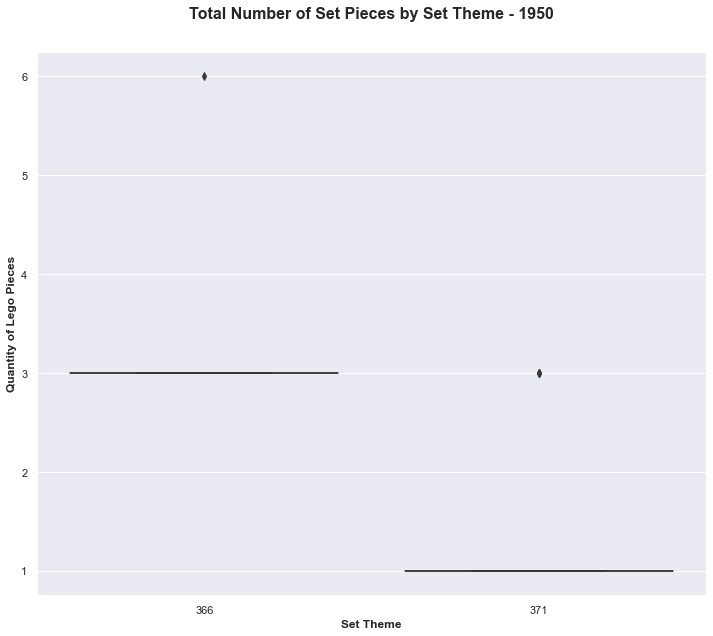

In [54]:
#BAD VISUALIZATION #BAD VISUALIZATION #BAD VISUALIZATION 
#BAD VISUALIZATION #BAD VISUALIZATION #BAD VISUALIZATION 
#BAD VISUALIZATION #BAD VISUALIZATION #BAD VISUALIZATION 

plt.figure(figsize = (12, 10))

sns.boxplot(data = legos[legos['set_year'] == 1950],
            x = 'set_theme',
            y = 'quantity',
            palette = 'viridis')

plt.title('Total Number of Set Pieces by Set Theme - 1950', 
          fontsize = 16,
          fontweight = 'bold',
          y = 1.05)

plt.xlabel('Set Theme',
           fontweight = 'bold')

plt.ylabel('Quantity of Lego Pieces',
           fontweight = 'bold');

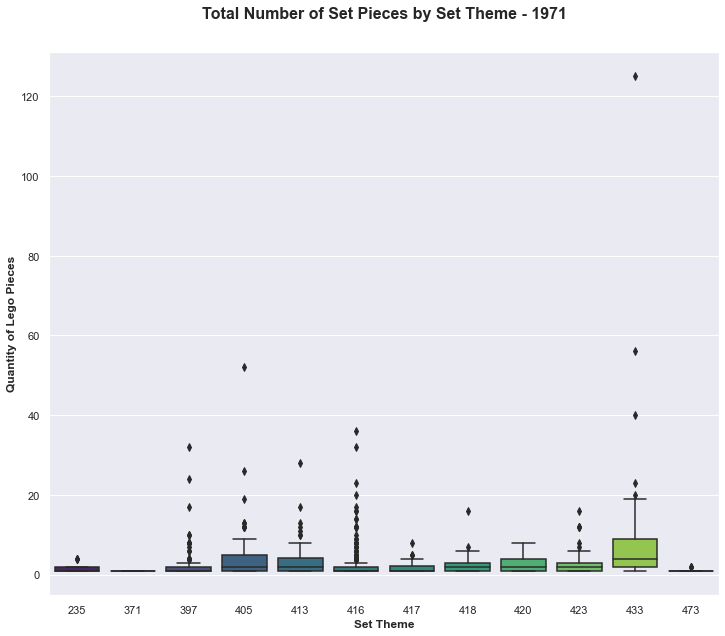

In [55]:
#looking at a random year, 1971:
plt.figure(figsize = (12, 10))

sns.boxplot(data = legos[legos['set_year'] == 1971],
            x = 'set_theme',
            y = 'quantity',
            palette = 'viridis')

plt.title('Total Number of Set Pieces by Set Theme - 1971', 
          fontsize = 16,
          fontweight = 'bold',
          y = 1.05)

plt.xlabel('Set Theme',
           fontweight = 'bold')

plt.ylabel('Quantity of Lego Pieces',
           fontweight = 'bold');

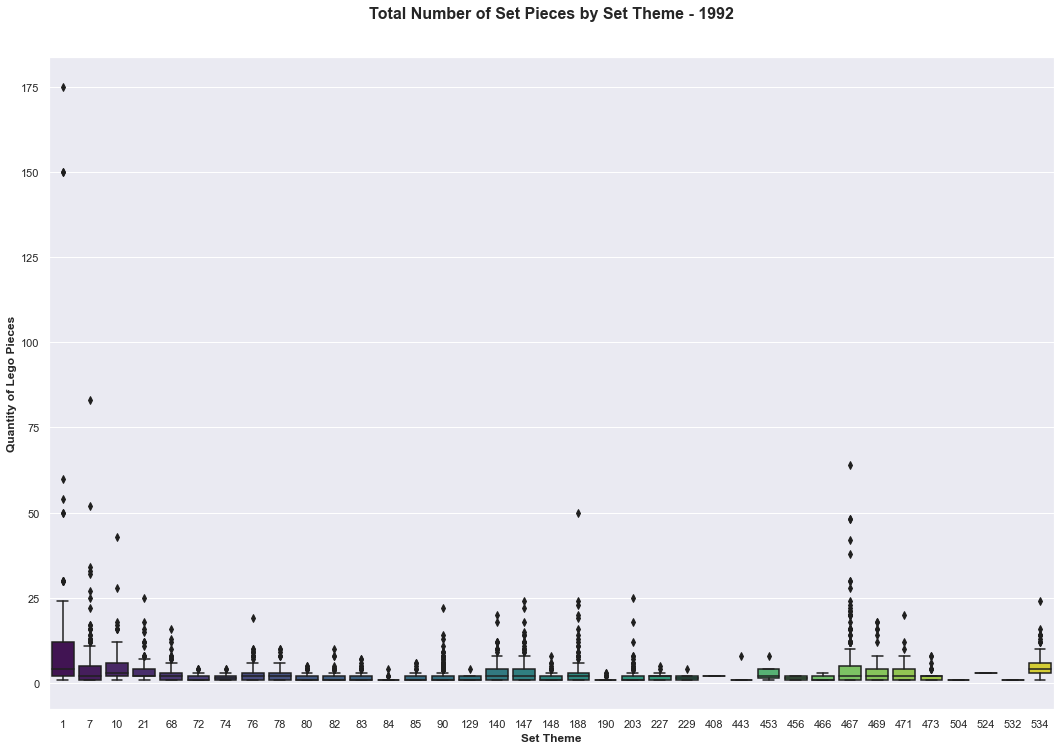

In [56]:
#looking at 1992, the year I was born:
plt.figure(figsize = (18, 12))

sns.boxplot(data = legos[legos['set_year'] == 1992],
            x = 'set_theme',
            y = 'quantity',
            palette = 'viridis')

plt.title('Total Number of Set Pieces by Set Theme - 1992', 
          fontsize = 16,
          fontweight = 'bold',
          y = 1.05)

plt.xlabel('Set Theme',
           fontweight = 'bold')
plt.xticks(rotation = 0)

plt.ylabel('Quantity of Lego Pieces',
           fontweight = 'bold');

In [57]:
legos.head()

,inventory_id,part_num,color_id,quantity,is_spare,part_name,part_cat_id,color_trans,invt_version,set_name,set_year,set_theme,total_set_parts,set_theme_parentid,set_age,percent_of_set
0,1,48379c01,72,1,0,Sports Promo Figure Base with Feet,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
1,1,48395,7,1,0,Sports Promo Snowboard from McDonald's Sports ...,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
2,1,mcsport6,25,1,0,Sports Promo Figure Head Torso Assembly McDona...,13,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
3,1,paddle,0,1,0,Sports Promo Paddle from McDonald's Sports Sets,27,0,1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,458,13,0.2500
4,3,11816pr0005,78,1,0,"Minifig Head Modified - Friends - Green Eyes, ...",13,0,1,Emma's Splash Pool,2012,494,43,0,5,0.0233


**Saving Neaten Data to New .csv**

In [58]:
legos.to_csv('../data/lego_pieces_neat.csv', index = False)